# Random Forest

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/superconductivity.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/superconductivity.parquet')

In [3]:
y_train = train.critical_temp
X_train = train.drop(columns=['critical_temp'])

In [4]:
y_validation = validation.critical_temp
X_validation = validation.drop(columns=['critical_temp'])

In [7]:
exploratory_depths = [1, 10, 20, 30, 40]
exploratory_estimators = [5, 10, 20, 30, 50, 60]

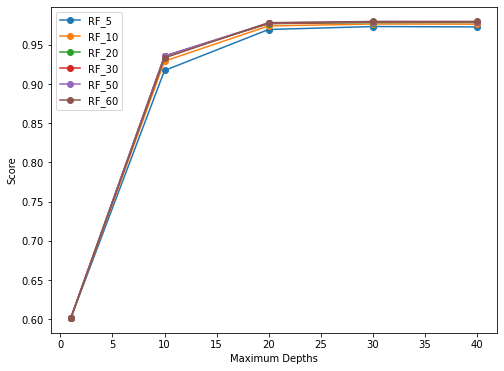

In [8]:
plt.figure(figsize=(8, 6))

for n in exploratory_estimators:
    plt.plot(exploratory_depths, [RandomForestRegressor(n_estimators=n, max_depth=i).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='RF_'+str(n))
    
plt.xlabel('Maximum Depths')
plt.ylabel('Score')
plt.legend()
plt.show()

We see that we don't improve our models by extending the forests, so, according to the previous plot:

In [9]:
max_depth = [1, 3, 5, 7, 10, 12, 15, 20, 22, 25]
n_estimators = [1, 5, 10, 15, 20]

In [11]:
models_list = []
names_list = []
for n in n_estimators:
    for i in max_depth:
        models_list.append(RandomForestRegressor(n_estimators=n, max_depth=i))
        names_list.append('RF_'+str(n)+'_'+str(i))

In [12]:
metrics = regression(models_list, names_list, '../../../data/model_output/metrics/superconductivity/random_forest.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
RF_1_1,0.119679,21.647384,22.005562,1.654601
RF_1_3,0.237396,17.151822,17.581302,2.503990
RF_1_5,0.367985,15.213621,15.942395,4.790271
RF_1_7,0.548533,12.611279,14.188388,12.505538
RF_1_10,0.703150,11.698348,13.626079,16.478662
RF_1_12,0.795840,9.577903,13.232202,38.153435
RF_1_15,1.011326,9.828193,13.016701,32.442465
RF_1_20,1.095039,8.369647,13.099429,56.511135
RF_1_22,1.086126,8.321940,12.911752,55.153154
RF_1_25,1.176821,8.317892,12.844631,54.421708


In [13]:
metrics.sort_values(by='Validation_RMSE')

,Run_Time,Train_RMSE,Validation_RMSE,delta%
RF_15_20,15.387836,5.195352,9.857551,89.737906
RF_20_22,21.337918,5.141590,9.884404,92.244105
RF_20_20,20.471237,5.229749,9.937935,90.026999
RF_20_25,21.990498,5.079602,9.942483,95.733495
RF_15_25,17.127182,5.094514,9.992980,96.151782
RF_15_22,15.839628,5.267465,9.993763,89.726234
RF_10_20,10.365252,5.406865,10.073060,86.301290
RF_20_15,17.284762,6.260307,10.098194,61.305080
RF_10_15,8.677806,6.289788,10.201190,62.186551
RF_15_15,13.057071,6.115347,10.207586,66.917532


In [14]:
metrics.sort_values(by='delta%')

,Run_Time,Train_RMSE,Validation_RMSE,delta%
RF_10_1,0.748996,21.605541,21.936918,1.533759
RF_15_1,1.093076,21.606001,21.938055,1.536857
RF_5_1,0.434838,21.605505,21.937649,1.537314
RF_20_1,1.442173,21.605593,21.937981,1.538434
RF_1_1,0.119679,21.647384,22.005562,1.654601
RF_1_3,0.237396,17.151822,17.581302,2.503990
RF_20_3,4.099004,16.591230,17.032373,2.658889
RF_5_3,1.077117,16.627301,17.157679,3.189800
RF_15_3,3.065799,16.588676,17.153549,3.405174
RF_10_3,2.072435,16.619763,17.197092,3.473748


The model that performs the best with delta below 10% is  **RF_20_7**, so let's retrain it and test it

In [5]:
test = pd.read_parquet('../../../data/model_input/test_sets/superconductivity.parquet')

In [6]:
y_test = test.critical_temp
X_test = test.drop(columns=['critical_temp'])

In [7]:
retrain = pd.concat([train, validation])

In [8]:
y_retrain = retrain.critical_temp
X_retrain = retrain.drop(columns=['critical_temp'])

In [21]:
model = RandomForestRegressor(n_estimators=20, max_depth=7).fit(X_retrain, y_retrain)

In [22]:
test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, test_pred)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 12.8171


It performs similarly

In [23]:
dump(model, '../../../data/model_output/models/superconductivity/best_random_forest.joblib')

['best_random_forest.joblib']

In [24]:
with open('../../../data/model_output/metrics/superconductivity/final_RMSE.txt', 'a') as f:
    f.write('\nRF, '+ str(rmse))

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_15068/3731660872.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],


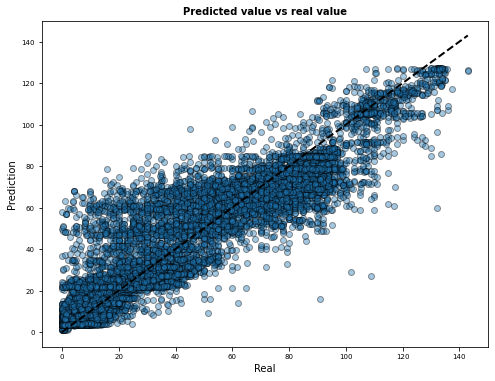

In [25]:
prediction_retrain = model.predict(X_retrain)
error_retrain   = prediction_retrain - y_retrain

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)

In [9]:
from joblib import load
load_mod = load('../../../data/model_output/models/superconductivity/best_random_forest.joblib')

train_pred = load_mod.predict(X_retrain)
rmse_train = root_mean_squared_error(y_retrain, train_pred)
test_pred = load_mod.predict(X_test)
rmse_test = root_mean_squared_error(y_test, test_pred)

In [10]:
import time 
time1 = time.time()
RandomForestRegressor(n_estimators=20, max_depth=7).fit(X_retrain, y_retrain)
time2 = time.time() - time1 

with open('../../../data/model_output/metrics/superconductivity/final_metrics.txt', 'a') as f:
     f.write(f'\nRF; {time2}; {rmse_train}; {rmse_test}')